<a href="https://colab.research.google.com/github/jfestradan/Modelado-y-simulacion/blob/master/Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

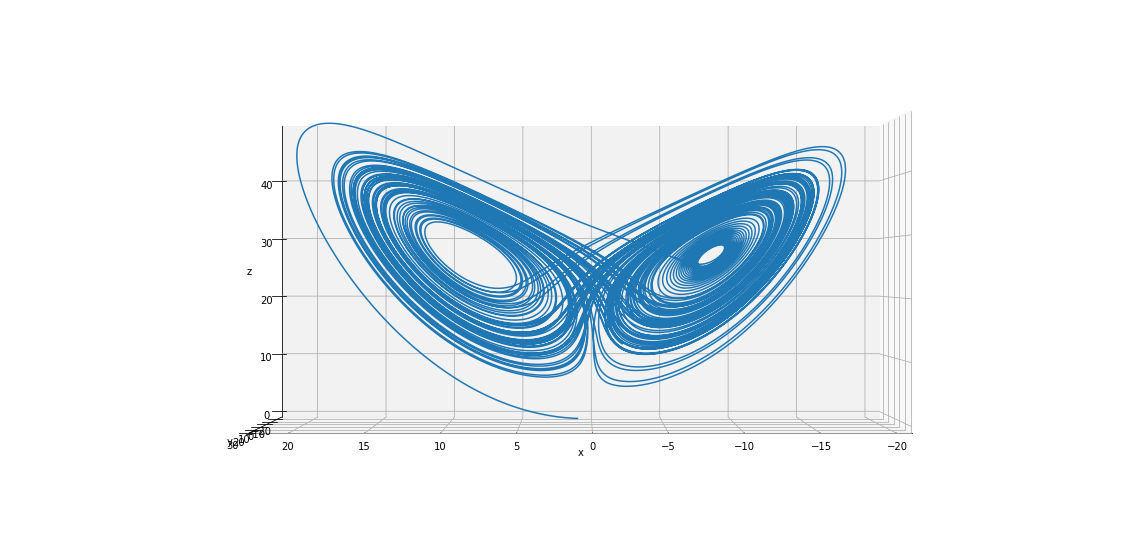

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import solve_ivp

def Lorenz_eq(t,xyz,sigma,beta,rho):
    x,y,z = xyz
    return [sigma*(y-x),x*(rho-z)-y,x*y-beta*z]
time = [0,100]
t = np.arange(time[0],time[1],0.001)
init_condi = [1,1,0]
solucion = solve_ivp(Lorenz_eq,time,init_condi,args=[10,8/3,28],t_eval=t)

t = solucion.t
x = solucion.y[0,:]
y = solucion.y[1,:]
z = solucion.y[2,:]


fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot3D(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0,90)

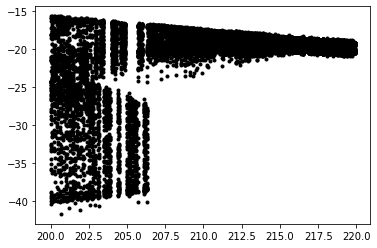

In [14]:

def event_lorenz(t,xyz,sigma,beta,rho):
    x,y,z = xyz
    return x+y

event_lorenz.direction = -1

time = [0,50]
t = np.linspace(time[0],time[1],10000)
init_condi = [0.1,0.1,0.1]

rs = np.arange(200,220,0.1)
for r in rs:
    solucion = solve_ivp(Lorenz_eq,time,init_condi,events=[event_lorenz],args=[10,8/3,r],t_eval=t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_ > 20:
            plt.plot(r,solucion.y_events[0][i,1],'.k')
    init_condi = solucion.y[:,-1]